In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#removing unwanted columns
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [18]:
col_name = ['Age','Embarked']
for i in col_name:
    print(f"Data type of {i} is {df[i].dtype}")

Data type of Age is float64
Data type of Embarked is object


In [24]:
#Removing any missing value from age and embarked 
df["Age"] = df['Age'].fillna(df["Age"].median()) #Because Age was skewed so applied median
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])


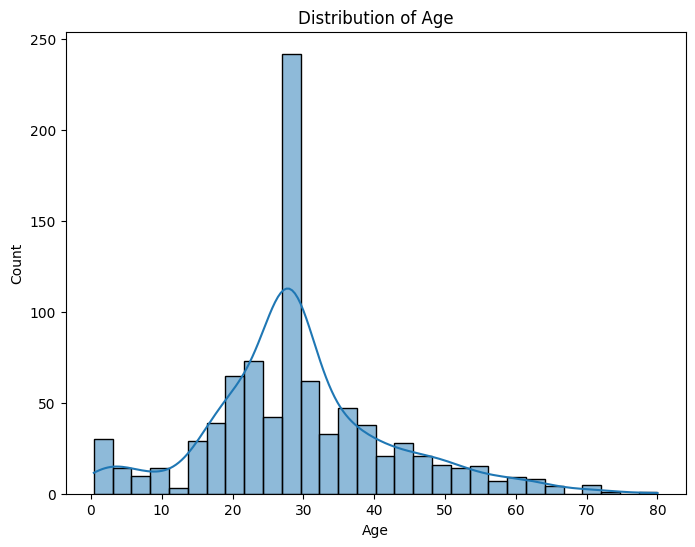

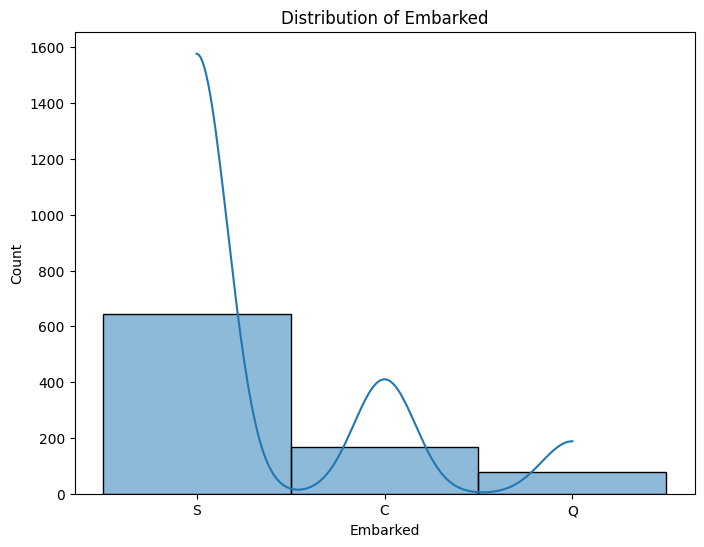

In [25]:
#lets check the skewness of the data now
for col in col_name:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
df.isnull().sum() #checking if any null remain

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [26]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [28]:
#encoding sex and embarked column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [29]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [32]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
x_train.shape,x_test.shape

((712, 8), (179, 8))

In [35]:
x_train.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [36]:
from sklearn.ensemble import RandomForestClassifier
rcf = RandomForestClassifier(n_estimators=100,random_state=0)

rcf.fit(x_train,y_train)
y_pred = rcf.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score,classification_report
print('Accuracy:',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [38]:
feature_scores = pd.Series(rcf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores #checking feature scores

Sex            0.247404
PassengerId    0.202700
Fare           0.197763
Age            0.166312
Pclass         0.073483
SibSp          0.044237
Parch          0.035349
Embarked       0.032753
dtype: float64

Text(0.5, 1.0, 'Visualizing Important Features')

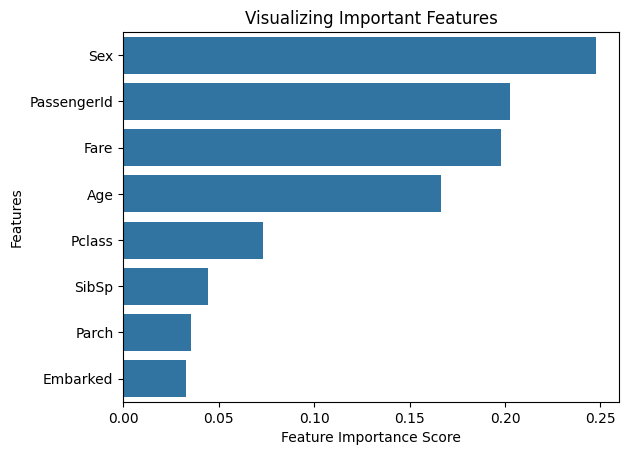

In [39]:
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")

In [40]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [41]:
#removing least scored feature and then checking the accuracy of the model again 
x = df.drop(['Survived','Embarked'],axis=1)
y = df['Survived']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rcf = RandomForestClassifier(n_estimators=100,random_state=0)

rcf.fit(x_train,y_train)
y_pred = rcf.predict(x_test)


In [45]:
from sklearn.metrics import accuracy_score,classification_report
print('Accuracy:',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred) #Using confusion matrix to check where the model is confused
print(f"Confusion matrix\n{cm}")

Confusion matrix
[[89 16]
 [18 56]]


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [51]:
#trying boosting to increase the accuraccy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_tree = DecisionTreeClassifier(max_depth=1)  # weak learner
ada = AdaBoostClassifier(estimator=base_tree, n_estimators=50, random_state=0)
ada.fit(x_train, y_train)

# Predict
y_pred = ada.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8100558659217877


In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_)

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}


In [53]:
#using 300 trees to increase accuracy 
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    random_state=0
)
rf.fit(x_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
y_pred = rf.predict(x_test)


In [55]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.8212290502793296


In [ ]:
#hencing with random forest : 83% accuracy
        #with feature selection : 81
        # with increasing trees : 82
       # with boosting method: 81